<a href="https://colab.research.google.com/github/afrojaakter/Neural-Computing/blob/main/Control.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

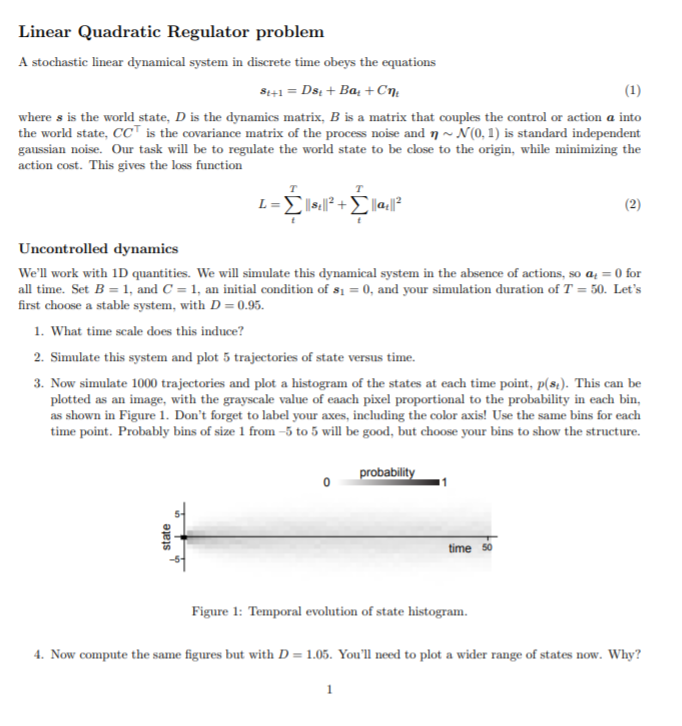

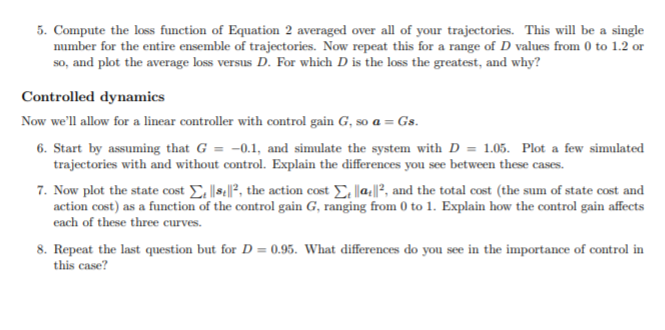

#####problem 1: 
Timescale at which the uncontrolled dynamics induce is,  $$\tau = \frac{1}{1-D}= 20$$

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def linearDynamicSystem(D, B, C, eta, a, s):
  '''
  A stochastic linear dynamical system in discrete time 
  returns the world state in next time step.
  Params::
  D: dynamic matrix
  B: matrix that couples the control or action a
  CC^T: covariance matrix of the process noise
  s: world state
  a: action
  eta: independent gaussian noise N(0, 1)
  '''
  return np.dot(D, s) + np.dot(B, a) + np.dot(C, eta)

def stateCost(s):
  ''' returns the state cost, which we want to be close to zero'''
  return np.sum(np.linalg.norm(s)**2)

def actionCost(a):
  '''returns action cost, we want to minimize the action cost'''
  return np.sum(np.linalg.norm(a)**2)

def loss(s, a):
  '''
  s: state of the world
  a: action'''
  return stateCost(s) + actionCost(a)

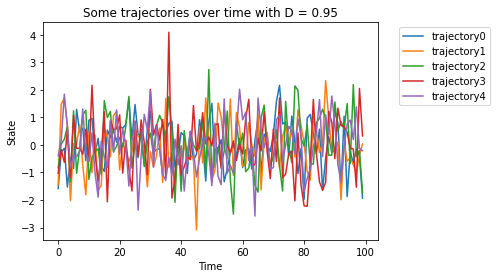

In [37]:
#problem 2:
a = 0 # action is absent, i.e. 0 for all time
s = 0  #initial world state

B = 1 
C = 1

T = 50  #total simulation time
D = 0.95 # a stable system

#Problem1: Time scale when the system induce
times = np.linspace(0, T, 100)

for i in range(5):
  st = []
  for t in times:
    eta = np.random.normal(0, 1, 1)
    st.append(linearDynamicSystem(D, B, C, eta, a, s))
  plt.plot(st, label = 'trajectory{}'.format(i))
plt.xlabel('Time')
plt.ylabel('State')
plt.title('Some trajectories over time with D = 0.95')
plt.legend(bbox_to_anchor=(1.05, 1),
           loc='upper left')
plt.show()

The above plot shows the trajectories of 5 states verses time.

###problem 3:

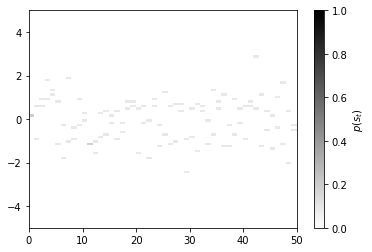

In [23]:
all_state = []
for i in range(1000):
  st = []
  for t in times:
    eta = np.random.normal(0, 1, 1)
    st.append(linearDynamicSystem(D, B, C, eta, a, s))
  all_state.append(st)

plt.figure()
plt.hist2d(times,np.array(all_state[s]).T[0],  
           bins=50, cmap='gray_r',density = True, vmax = 1, vmin = 0)
cb = plt.colorbar()
plt.ylim(-5, 5)
cb.set_label('$p(s_t)$',size=10)
plt.show()

The above plot shows the temporal evolution of state histogram over time with dynamics D = 0.95 

####problem 4:

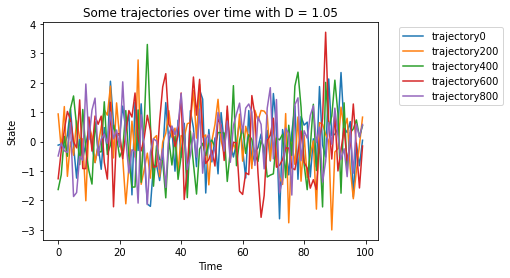

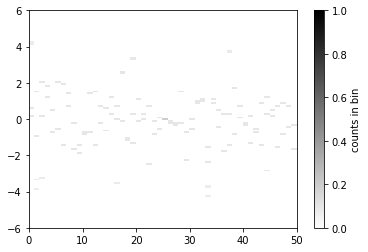

In [38]:
a = 0 # action is absent, i.e. 0 for all time
s = 0  #initial world state

B = 1 
C = 1

T = 50  #total simulation time
D = 1.05 # a stable system

#Problem1: Time scale when the system induce
times = np.linspace(0, T, 100)

all_state = []
num_trajectory = 1000
for i in range(num_trajectory):
  st = []
  for t in times:
    eta = np.random.normal(0, 1, 1)
    st.append(linearDynamicSystem(D, B, C, eta, a, s))
  all_state.append(st)
  if i%200 == 0:
    plt.plot(st, label = 'trajectory{}'.format(i))
plt.xlabel('Time')
plt.ylabel('State')
plt.title('Some trajectories over time with D = 1.05')
plt.legend(bbox_to_anchor=(1.05, 1),
           loc='upper left')
plt.show()

for s in range(len(all_state)):
  plt.hist2d(times,np.array(all_state[s]).T[0],  
           bins=50, cmap='gray_r',density = True, vmax = 1, vmin = 0)
cb = plt.colorbar()
plt.ylim(-6, 6)
cb.set_label('counts in bin')
plt.show()

The above plot shows the histogram of 1000 trajectories with dynamics, D = 1.05. We need wider range of states now because the loss goes up with the value of D. Since loss goes up means the states are not close to origin in this case, as the action cost if fixed.

####problem 5:

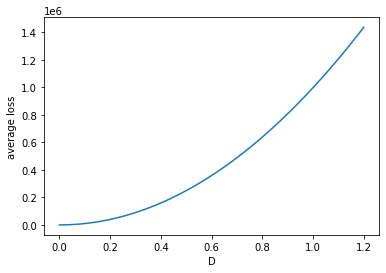

In [169]:
D = np.linspace(0, 1.2, 100)

L = []
for d in D:
  all_state = []
  num_trajectory = 1000
  for i in range(num_trajectory):
    st = []
    for t in times:
      eta = np.random.normal(0, 1, 1)
      st.append(linearDynamicSystem(d, B, C, eta, a, s))
    all_state.append(st)
  L.append(loss(np.mean(all_state), a))

plt.figure()
plt.plot(D, L)
plt.xlabel('D')
plt.ylabel('average loss')
plt.show()

The above plot shows the average loss of all trajectories verses the range of dynamics D. We see the loss goes up the values of D. We get largest average loss when D = 1.2

###Controlled dynamics
 

###Probelm 6:

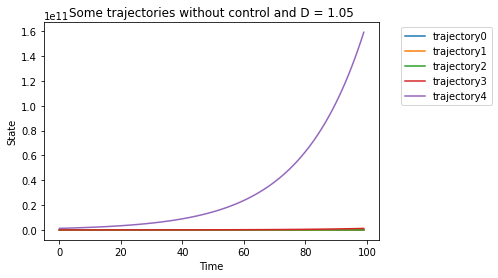

In [6]:
import numpy as np
import matplotlib.pyplot as plt

s = 0  #initial world state
B = 1 
C = 1
T = 50  #total simulation time
D = 1.05 # a stable system
G = 0
times = np.linspace(0, T, 100)

all_state = []
num_trajectory = 5
for i in range(num_trajectory):
  st = []
  for t in times:
    eta = np.random.normal(0, 1, 1)
    at = np.dot(G, s)
    s = linearDynamicSystem(D, B, C, eta, at, s)
    st.append(s)
  all_state.append(st)
  plt.plot(st, label = 'trajectory{}'.format(i))
plt.xlabel('Time')
plt.ylabel('State')
plt.title('Some trajectories without control and D = 1.05')
plt.legend(bbox_to_anchor=(1.05, 1),
           loc='upper left')
plt.show()

The above plot shows some trajectories without control.

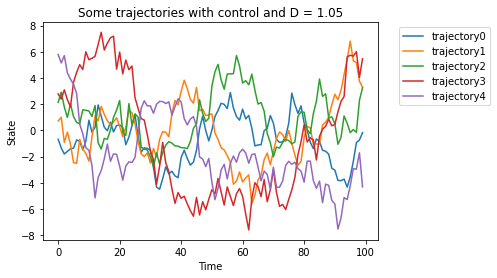

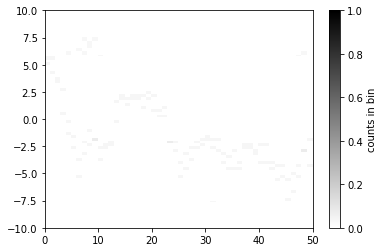

In [7]:
s = 0  #initial world state
B = 1 
C = 1
T = 50  #total simulation time
D = 1.05 # a stable system
G = - 0.1
times = np.linspace(0, T, 100)

all_state = []
num_trajectory = 5
for i in range(num_trajectory):
  st = []
  for t in times:
    eta = np.random.normal(0, 1, 1)
    at = np.dot(G, s)
    s = linearDynamicSystem(D, B, C, eta, at, s)
    st.append(s)
  all_state.append(st)
  plt.plot(st, label = 'trajectory{}'.format(i))
plt.xlabel('Time')
plt.ylabel('State')
plt.title('Some trajectories with control and D = 1.05')
plt.legend(bbox_to_anchor=(1.05, 1),
           loc='upper left')
plt.show()

for s in range(len(all_state)):
  plt.hist2d(times,np.array(all_state[s]).T[0],  
           bins=50, cmap='gray_r',density = True, vmax = 1, vmin = 0)
cb = plt.colorbar()
plt.ylim(-10,10)
cb.set_label('counts in bin')
plt.show()

The first plot shows some state trajectories of the controlled dynamics over time. For the uncontrolled dynamics the trajectories were just some random noise with 0 mean. For the controlled dynamics the trajectories are not random noise. 

The temporal evolution of the controlled dynamics follow the pattern of the state trajectories, not clustered around zero.

###Problem 7:

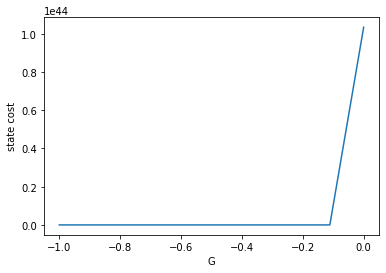

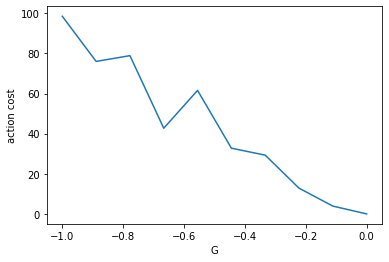

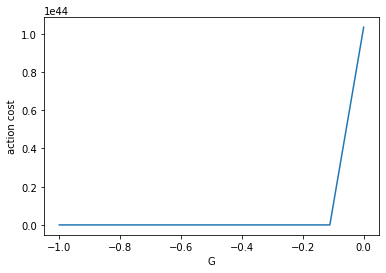

In [37]:
#Problem 7:
D = 1.05
G = np.linspace(-1, 0, 10)
s = 0
S_cost = []
A_cost = []
for g in G:
  all_state = []
  num_trajectory = 10
  for i in range(num_trajectory):
    st = []
    at = []
    for t in times:
      eta = np.random.normal(0, 1, 1)
      a = np.dot(g, s)
      s = linearDynamicSystem(D, B, C, eta, a, s)
      at.append(a)
      st.append(s)
    all_state.append(st)
  S_cost.append(stateCost(st))
  A_cost.append(actionCost(at))

plt.figure()
plt.plot(G, S_cost)
plt.xlabel('G')
plt.ylabel('state cost')
plt.show()

plt.figure()
plt.plot(G, A_cost)
plt.xlabel('G')
plt.ylabel('action cost')
plt.show()

plt.figure()
plt.plot(G, np.array(S_cost) + np.array(A_cost))
plt.xlabel('G')
plt.ylabel('action cost')
plt.show()

####For D = 1.05
The top and middle plots show the state cost and  action cost of all states and actions for different G values ranges from -1 to 0. The last plot shows the total cost of the controlled dynamics for diffirent G values.

We see the state cost and total cost becomes extremely large when control gain increases from -0.1 to 0 and the action cost decreases.

####Problem 8:

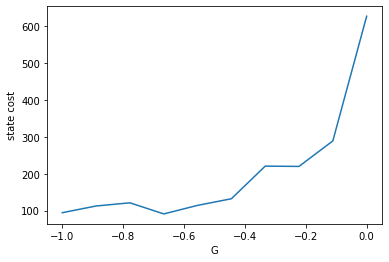

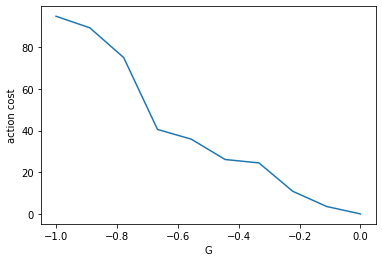

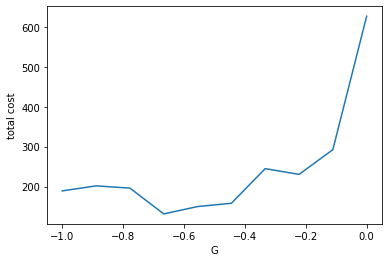

In [38]:
D = 0.95
G = np.linspace(-1, 0, 10)
s = 0
S_cost = []
A_cost = []

for g in G:
  all_state = []
  num_trajectory = 10
  for i in range(num_trajectory):
    st = []
    at = []
    for t in times:
      eta = np.random.normal(0, 1, 1)
      a = np.dot(g, s)
      s = linearDynamicSystem(D, B, C, eta, a, s)
      at.append(a)
      st.append(s)
    all_state.append(st)
  S_cost.append(stateCost(st))
  A_cost.append(actionCost(at))

plt.figure()
plt.plot(G, S_cost)
plt.xlabel('G')
plt.ylabel('state cost')
plt.show()

plt.figure()
plt.plot(G, A_cost)
plt.xlabel('G')
plt.ylabel('action cost')
plt.show()

plt.figure()
plt.plot(G, (np.array(S_cost) + np.array(A_cost)))
plt.xlabel('G')
plt.ylabel('total cost')
plt.show()

####For D = 0.95
The top and middle plots show the state cost and  action cost of all states and actions for different G values ranges from -1 to 0. The last plot shows the total cost of the controlled dynamics for diffirent G values. 

The action cost for both D values 0.95 and 1.05 has similar pattern, whereas the state cost extremely large with the increase of G from -0.1 to 0 when D = 1.05. With D = 0.95 the state cost goes up but it way smaller than the state cost with D = 1.05. The result of state cost also affects the total cost for cases.

Since the value of $(G + D)<1 $ in this case the network dynamics is stable in this case. For D = 1.05 and $G>-0.5$, makes $(G + D) >1 $, then the network blow up. That's what we see in problem 7.